In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#adding the dataset
loan = pd.read_csv('train_data.csv')
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#checking Shape
loan.shape

(614, 13)

In [4]:
#checking description
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#checking nulls
round((loan.isnull().sum()/len(loan)*100),2).sort_values(ascending=False)

Credit_History       8.14
Self_Employed        5.21
LoanAmount           3.58
Dependents           2.44
Loan_Amount_Term     2.28
Gender               2.12
Married              0.49
Loan_ID              0.00
Education            0.00
ApplicantIncome      0.00
CoapplicantIncome    0.00
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [6]:
#dropping all nulls
loan.dropna(inplace=True)

In [7]:
loan.drop(['Loan_ID'], axis = 1, inplace = True)

In [8]:
#Rechecking nulls
round((loan.isnull().sum()/len(loan)*100),2).sort_values(ascending=False)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [9]:
num_cols = loan.select_dtypes(include=['int', 'float'])
num_cols.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
5,5417,4196.0,267.0,360.0,1.0


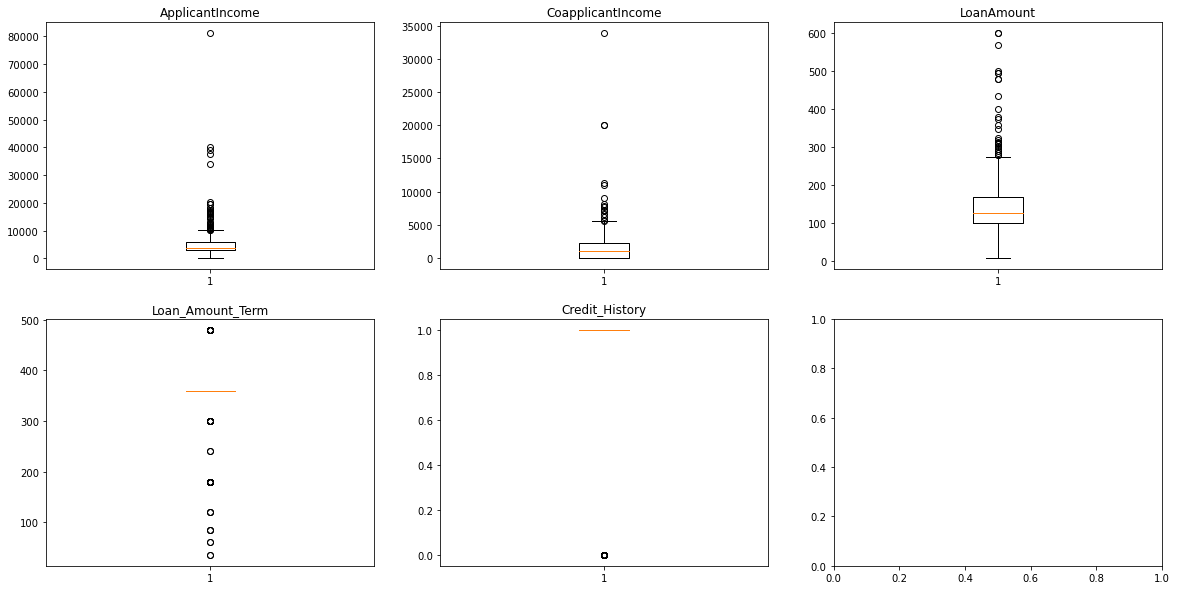

In [10]:
#finding outliers in outlier_cols
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.ravel()
for i, col in enumerate(num_cols):
    axs[i].boxplot(loan[col])
    axs[i].set_title(col)

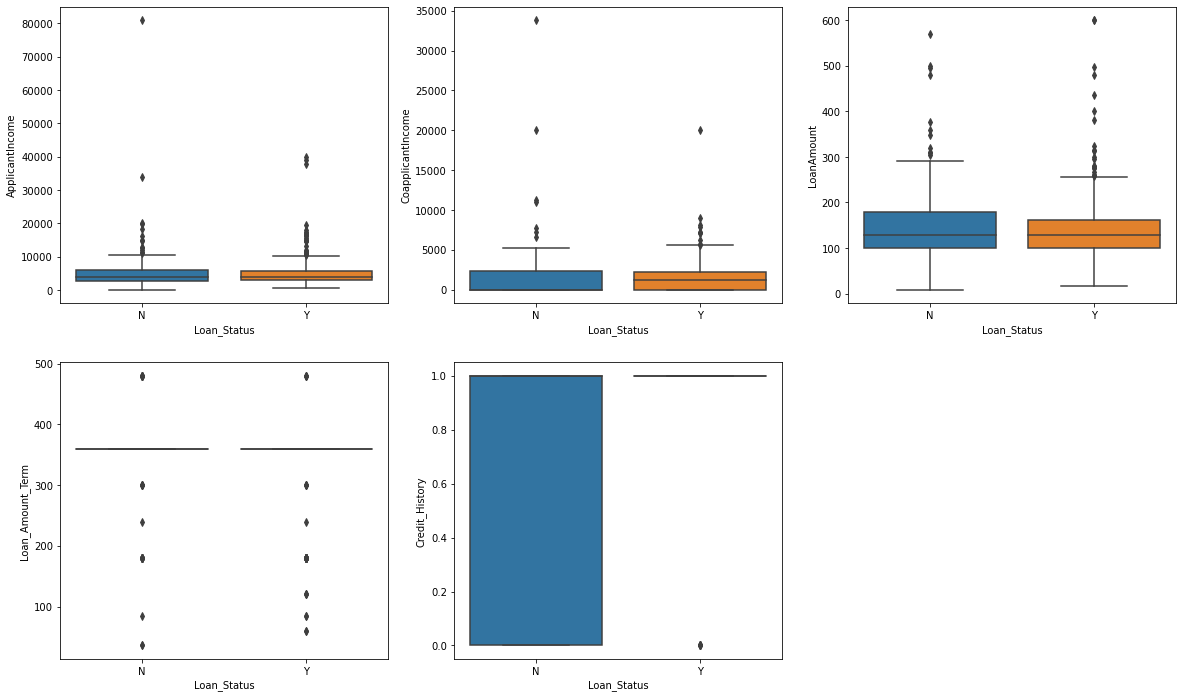

In [11]:
#EDA
plt.figure(figsize=(20, 12))  
plt.subplot(2,3,1)
sns.boxplot(x = 'Loan_Status', y = 'ApplicantIncome', data = loan)
plt.subplot(2,3,2)
sns.boxplot(x = 'Loan_Status', y = 'CoapplicantIncome', data = loan)
plt.subplot(2,3,3)
sns.boxplot(x = 'Loan_Status', y = 'LoanAmount', data = loan)
plt.subplot(2,3,4)
sns.boxplot(x = 'Loan_Status', y = 'Loan_Amount_Term', data = loan)
plt.subplot(2,3,5)
sns.boxplot(x = 'Loan_Status', y = 'Credit_History', data = loan)
plt.show()

In [12]:
#get categorical columns
cat_data = loan.select_dtypes(include=['object']).columns
print(cat_data)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


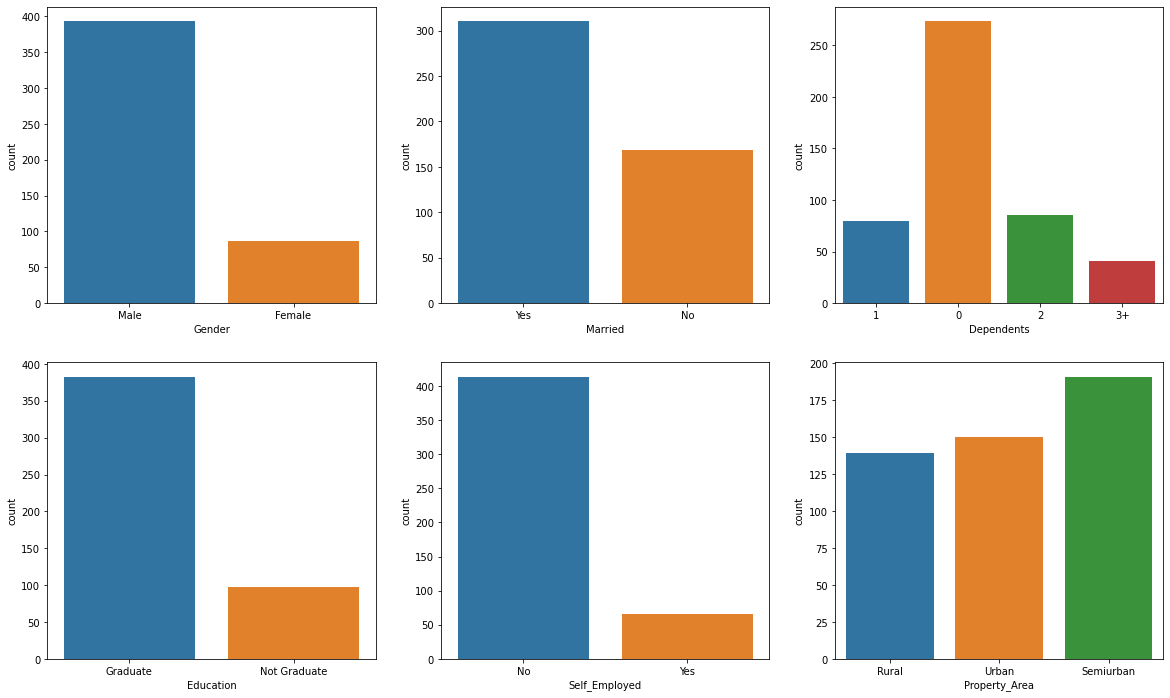

In [13]:
#EDA
plt.figure(figsize=(20, 12))  
plt.subplot(2,3,1)
sns.countplot(x = 'Gender', data = loan)
plt.subplot(2,3,2)
sns.countplot(x = 'Married', data = loan)
plt.subplot(2,3,3)
sns.countplot(x = 'Dependents', data = loan)
plt.subplot(2,3,4)
sns.countplot(x = 'Education', data = loan)
plt.subplot(2,3,5)
sns.countplot(x = 'Self_Employed', data = loan)
plt.subplot(2,3,6)
sns.countplot(x = 'Property_Area', data = loan)
plt.show()

In [14]:
#get categorical columns dummy variables
cat_dummy = pd.get_dummies(loan[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status']], drop_first=True)

In [15]:
#concatinate dummy variables with original data
loan = pd.concat([loan,cat_dummy],axis=1)

In [16]:
#dropping the original columns
loan= loan.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],1)

In [17]:
#checking the new data frame
loan.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1


In [18]:
#putting all the variables in x-dataset
X = loan.drop(['Loan_Status_Y'],1)
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1


In [19]:
Y = loan['Loan_Status_Y']
Y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status_Y, dtype: uint8

In [20]:
num_cols.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

<AxesSubplot:>

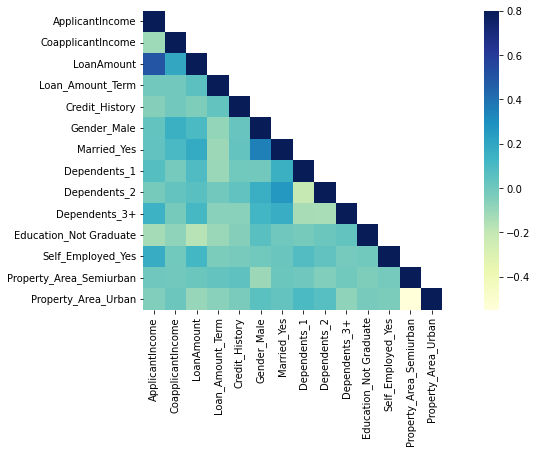

In [21]:
mask = np.array(X.corr())
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,5.5)
sns.heatmap(X.corr(), mask=mask,vmax=.8, square=True,annot=False,cmap="YlGnBu")

In [22]:
#feature scaling using Min-Max scaler
scaler = MinMaxScaler()
X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']] = scaler.fit_transform(X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']])
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,0.054830,0.044567,0.201354,0.72973,1.0,1,1,1,0,0,0,0,0,0
2,0.035250,0.000000,0.096447,0.72973,1.0,1,1,0,0,0,0,1,0,1
3,0.030093,0.069687,0.187817,0.72973,1.0,1,1,0,0,0,1,0,0,1
4,0.072356,0.000000,0.223350,0.72973,1.0,1,0,0,0,0,0,0,0,1
5,0.065145,0.124006,0.436548,0.72973,1.0,1,1,0,1,0,0,1,0,1


In [23]:
#splitting the dataset in test and train
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

In [24]:
#using RFECV to find optimal no. features
rfecv = RFECV(estimator=logreg, cv=5)

In [25]:
rfecv.fit(X, Y)

RFECV(cv=5, estimator=LogisticRegression())

In [26]:
rfecv.grid_scores_

array([0.80833333, 0.80833333, 0.80833333, 0.80833333, 0.80833333,
       0.81041667, 0.81041667, 0.81041667, 0.8125    , 0.81041667,
       0.80833333, 0.80833333, 0.80833333, 0.80833333])

In [27]:
num_features = X.shape
num_features[1]

14

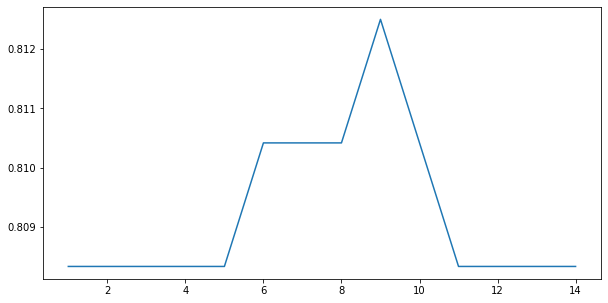

In [28]:
plt.figure(figsize=[10, 5])
plt.plot(range(1, num_features[1]+1), rfecv.grid_scores_)
plt.show()

In [29]:
#model selection of correct number of feature selection
rfecv.n_features_

9

In [30]:
#feature selection using RFE
rfe = RFE(logreg, 9)            
rfe = rfe.fit(X, Y)
# Now we will have a look at which features have been selected by the RFE.
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('ApplicantIncome', False, 6),
 ('CoapplicantIncome', True, 1),
 ('LoanAmount', True, 1),
 ('Loan_Amount_Term', True, 1),
 ('Credit_History', True, 1),
 ('Gender_Male', True, 1),
 ('Married_Yes', True, 1),
 ('Dependents_1', True, 1),
 ('Dependents_2', False, 2),
 ('Dependents_3+', False, 5),
 ('Education_Not Graduate', True, 1),
 ('Self_Employed_Yes', False, 3),
 ('Property_Area_Semiurban', True, 1),
 ('Property_Area_Urban', False, 4)]

In [31]:
#features selected by RFE
col = X.columns[rfe.support_]
col

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Gender_Male', 'Married_Yes', 'Dependents_1', 'Education_Not Graduate',
       'Property_Area_Semiurban'],
      dtype='object')

In [32]:
#adding the selected features only to the training dataset
X_const = sm.add_constant(X[col])

In [33]:
#now fit the model on new dataset including only the top 9 features
logm = sm.GLM(Y,X_const, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Loan_Status_Y   No. Observations:                  480
Model:                            GLM   Df Residuals:                      470
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -218.40
Date:                Sat, 18 Feb 2023   Deviance:                       436.79
Time:                        20:43:25   Pearson chi2:                     476.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.3374      0.831     -2.814      0.005      -3.965      -0.710
CoapplicantIncome          -1.8086      1.416     -1.277      0.202      -4.585       0.967
LoanAmount                 -1.5376      0.862     -1.783      0.075      -3.227       0.152
Loan_Amount_Term           -0.4632      0.892     -0.519      0.604      -2.212       1.286
Credit_History              3.6264      0.429      8.462      0.000       2.786       4.466
Gender_Male                 0.3445      0.330      1.045      0.296      -0.302       0.991
Married_Yes                 0.6532      0.274      2.387      0.017       0.117       1.190
Dependents_1               -0.4436      0.320     -1.388      0.165      -1.070       0.183
Education_Not Graduate     -0.4398      0.299     -1.469      0.142      -1.026       0.147
Property_Area_Semiurban     0.9035      0.265      3.405      0.001       0.383       1.424
===========================================================================================
"""

In [34]:
# Now we will make a VIF df.
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X[col].values, i) for i in range(X[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Loan_Amount_Term,9.35
3,Credit_History,6.03
4,Gender_Male,5.99
1,LoanAmount,4.12
5,Married_Yes,3.41
8,Property_Area_Semiurban,1.66
0,CoapplicantIncome,1.45
7,Education_Not Graduate,1.27
6,Dependents_1,1.23


In [35]:
#removing Loan_Amount_Term as it has high p-value and VIF
col = col.drop('Loan_Amount_Term',1)
col

Index(['CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Education_Not Graduate',
       'Property_Area_Semiurban'],
      dtype='object')

In [36]:
#now fit the new model on new dataset including only the top 8 features
X_const = sm.add_constant(X[col])
logm1 = sm.GLM(Y,X_const, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Loan_Status_Y   No. Observations:                  480
Model:                            GLM   Df Residuals:                      471
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -218.54
Date:                Sat, 18 Feb 2023   Deviance:                       437.07
Time:                        20:43:26   Pearson chi2:                     476.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.6706      0.532     -5.017      0.000      -3.714      -1.627
CoapplicantIncome          -1.8017      1.414     -1.274      0.203      -4.574       0.970
LoanAmount                 -1.5616      0.863     -1.809      0.070      -3.253       0.130
Credit_History              3.6208      0.429      8.449      0.000       2.781       4.461
Gender_Male                 0.3556      0.329      1.081      0.279      -0.289       1.000
Married_Yes                 0.6644      0.273      2.437      0.015       0.130       1.199
Dependents_1               -0.4254      0.318     -1.338      0.181      -1.049       0.198
Education_Not Graduate     -0.4241      0.298     -1.425      0.154      -1.007       0.159
Property_Area_Semiurban     0.9033      0.265      3.404      0.001       0.383       1.423
===========================================================================================
"""

In [37]:
# Now we will make a VIF df.
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X[col].values, i) for i in range(X[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Gender_Male,5.36
2,Credit_History,4.27
1,LoanAmount,3.58
4,Married_Yes,3.41
7,Property_Area_Semiurban,1.60
0,CoapplicantIncome,1.45
6,Education_Not Graduate,1.25
5,Dependents_1,1.23


In [38]:
#removing Gender_Male as it has high p-value and VIF
col = col.drop('Gender_Male',1)
col

Index(['CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Married_Yes',
       'Dependents_1', 'Education_Not Graduate', 'Property_Area_Semiurban'],
      dtype='object')

In [39]:
#now fit the new model on new dataset including only the top 7 features
X_const = sm.add_constant(X[col])
logm2 = sm.GLM(Y,X_const, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Loan_Status_Y   No. Observations:                  480
Model:                            GLM   Df Residuals:                      472
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -219.11
Date:                Sat, 18 Feb 2023   Deviance:                       438.22
Time:                        20:43:26   Pearson chi2:                     476.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.4549      0.492     -4.995      0.000      -3.418      -1.492
CoapplicantIncome          -1.5638      1.385     -1.129      0.259      -4.279       1.151
LoanAmount                 -1.5424      0.869     -1.775      0.076      -3.245       0.160
Credit_History              3.6253      0.428      8.467      0.000       2.786       4.465
Married_Yes                 0.7688      0.254      3.024      0.002       0.270       1.267
Dependents_1               -0.4578      0.316     -1.447      0.148      -1.078       0.162
Education_Not Graduate     -0.4045      0.297     -1.364      0.173      -0.986       0.177
Property_Area_Semiurban     0.8707      0.263      3.315      0.001       0.356       1.386
===========================================================================================
"""

In [40]:
# Now we will make a VIF df.
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X[col].values, i) for i in range(X[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Credit_History,3.51
1,LoanAmount,3.35
3,Married_Yes,2.84
6,Property_Area_Semiurban,1.60
0,CoapplicantIncome,1.42
4,Dependents_1,1.23
5,Education_Not Graduate,1.20


In [41]:
#removing CoapplicantIncome as it has high p-value
col = col.drop('CoapplicantIncome',1)
col

Index(['LoanAmount', 'Credit_History', 'Married_Yes', 'Dependents_1',
       'Education_Not Graduate', 'Property_Area_Semiurban'],
      dtype='object')

In [42]:
#now fit the new model on new dataset including only the top 6 features
X_const = sm.add_constant(X[col])
logm3 = sm.GLM(Y,X_const, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Loan_Status_Y   No. Observations:                  480
Model:                            GLM   Df Residuals:                      473
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -219.75
Date:                Sat, 18 Feb 2023   Deviance:                       439.49
Time:                        20:43:27   Pearson chi2:                     477.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.4925      0.491     -5.076      0.000      -3.455      -1.530
LoanAmount                 -1.6762      0.857     -1.956      0.051      -3.356       0.004
Credit_History              3.6198      0.428      8.462      0.000       2.781       4.458
Married_Yes                 0.7496      0.253      2.961      0.003       0.253       1.246
Dependents_1               -0.4336      0.315     -1.375      0.169      -1.052       0.184
Education_Not Graduate     -0.3831      0.295     -1.297      0.195      -0.962       0.196
Property_Area_Semiurban     0.8739      0.262      3.331      0.001       0.360       1.388
===========================================================================================
"""

In [43]:
# Now we will make a VIF df.
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X[col].values, i) for i in range(X[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Credit_History,3.49
0,LoanAmount,3.17
2,Married_Yes,2.81
5,Property_Area_Semiurban,1.60
3,Dependents_1,1.23
4,Education_Not Graduate,1.20


In [44]:
#removing Education_Not Graduate as it has high p-value
col = col.drop('Education_Not Graduate',1)
col

Index(['LoanAmount', 'Credit_History', 'Married_Yes', 'Dependents_1',
       'Property_Area_Semiurban'],
      dtype='object')

In [45]:
#now fit the new model on new dataset including only the top 6 features
X_const = sm.add_constant(X[col])
logm4 = sm.GLM(Y,X_const, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Loan_Status_Y   No. Observations:                  480
Model:                            GLM   Df Residuals:                      474
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -220.57
Date:                Sat, 18 Feb 2023   Deviance:                       441.14
Time:                        20:43:27   Pearson chi2:                     479.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.6270      0.482     -5.452      0.000      -3.571      -1.683
LoanAmount                 -1.4618      0.838     -1.744      0.081      -3.104       0.181
Credit_History              3.6326      0.427      8.501      0.000       2.795       4.470
Married_Yes                 0.7347      0.253      2.909      0.004       0.240       1.230
Dependents_1               -0.4325      0.314     -1.375      0.169      -1.049       0.184
Property_Area_Semiurban     0.8760      0.262      3.344      0.001       0.363       1.389
===========================================================================================
"""

In [46]:
# Now we will make a VIF df.
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X[col].values, i) for i in range(X[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Credit_History,3.37
0,LoanAmount,3.16
2,Married_Yes,2.77
4,Property_Area_Semiurban,1.60
3,Dependents_1,1.23


In [47]:
#removing Dependents_1 as it has high p-value
col = col.drop('Dependents_1',1)
col

Index(['LoanAmount', 'Credit_History', 'Married_Yes',
       'Property_Area_Semiurban'],
      dtype='object')

In [48]:
#now fit the new model on new dataset including only the top 6 features
X_const = sm.add_constant(X[col])
logm5 = sm.GLM(Y,X_const, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Loan_Status_Y   No. Observations:                  480
Model:                            GLM   Df Residuals:                      475
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -221.49
Date:                Sat, 18 Feb 2023   Deviance:                       442.98
Time:                        20:43:28   Pearson chi2:                     481.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.6350      0.482     -5.467      0.000      -3.580      -1.690
LoanAmount                 -1.5223      0.844     -1.804      0.071      -3.176       0.131
Credit_History              3.6157      0.426      8.487      0.000       2.781       4.451
Married_Yes                 0.6775      0.248      2.734      0.006       0.192       1.163
Property_Area_Semiurban     0.8647      0.261      3.312      0.001       0.353       1.376
===========================================================================================
"""

In [49]:
# Now we will make a VIF df.
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X[col].values, i) for i in range(X[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Credit_History,3.37
0,LoanAmount,3.13
2,Married_Yes,2.70
3,Property_Area_Semiurban,1.60


In [50]:
# Now we will assign the probabilities of a loan being given/not on the Y set
Y_pred = res.predict(X_const)
round(Y_pred[:10],2)

1     0.79
2     0.82
3     0.80
4     0.65
5     0.73
6     0.81
7     0.19
8     0.78
9     0.84
10    0.82
dtype: float64

In [51]:
# Now we will reshape it into an array.
Y_pred = Y_pred.values.reshape(-1)
Y_pred[:10]

array([0.7944048 , 0.81926636, 0.79774997, 0.6549084 , 0.72980724,
       0.80794095, 0.1859424 , 0.77706628, 0.83850707, 0.81773574])

In [52]:
# Now we will create a new dataframe containing the actual hot leads and the probabilities predicted by the model
Y_pred_df = pd.DataFrame({'Converted':Y.values, 'Conversion_Prob':Y_pred})
Y_pred_df.head()

,Converted,Conversion_Prob
0,0,0.794405
1,1,0.819266
2,1,0.797750
3,1,0.654908
4,1,0.729807


In [53]:
#we will check the specifity and sensitivity to find the optimal cut-off. To do that we will start with creating columns with
#different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_pred_df[i]= Y_pred_df.Conversion_Prob.map(lambda x: 1 if x > i else 0)
Y_pred_df.head()

,Converted,Conversion_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.794405,1,1,1,1,1,1,1,1,0,0
1,1,0.819266,1,1,1,1,1,1,1,1,1,0
2,1,0.797750,1,1,1,1,1,1,1,1,0,0
3,1,0.654908,1,1,1,1,1,1,1,0,0,0
4,1,0.729807,1,1,1,1,1,1,1,1,0,0


In [54]:
from sklearn import metrics

In [55]:
# Now we will create a df to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_pred_df.Converted, Y_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.691667  1.000000  0.000000
0.1   0.1  0.766667  0.990964  0.263514
0.2   0.2  0.802083  0.978916  0.405405
0.3   0.3  0.808333  0.978916  0.425676
0.4   0.4  0.808333  0.978916  0.425676
0.5   0.5  0.810417  0.978916  0.432432
0.6   0.6  0.818750  0.972892  0.472973
0.7   0.7  0.760417  0.825301  0.614865
0.8   0.8  0.614583  0.542169  0.777027
0.9   0.9  0.425000  0.174699  0.986486


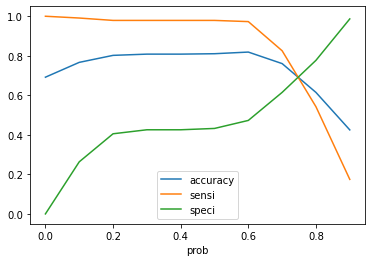

In [56]:
# Now we will plot it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [57]:
#0.7 seems to be optimal cutoff
Y_pred_df['final_predicted'] = Y_pred_df.Conversion_Prob.map(lambda x: 1 if x > 0.7 else 0)
Y_pred_df.head()

,Converted,Conversion_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.794405,1,1,1,1,1,1,1,1,0,0,1
1,1,0.819266,1,1,1,1,1,1,1,1,1,0,1
2,1,0.797750,1,1,1,1,1,1,1,1,0,0,1
3,1,0.654908,1,1,1,1,1,1,1,0,0,0,0
4,1,0.729807,1,1,1,1,1,1,1,1,0,0,1


In [58]:
# Now we will create a ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [59]:
fpr, tpr, thresholds = metrics.roc_curve( Y_pred_df.Converted, Y_pred_df.Conversion_Prob, drop_intermediate = False )

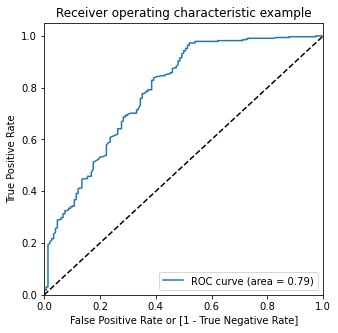

In [60]:
# Now we will call the ROC function

draw_roc(Y_pred_df.Converted, Y_pred_df.Conversion_Prob)

In [61]:
# Now we will create the confusion matrix once again

confusion = metrics.confusion_matrix(Y_pred_df.Converted, Y_pred_df.final_predicted )
print(confusion)

[[ 91  57]
 [ 58 274]]


In [62]:
# Now we will evaluate our model once again

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#business prob. = loan given to someone who shouldnt have been given - loss
#business prob. = loan given to someone who shouldnt have been given - loss

In [63]:
#sensitivity
sensitivity = TP/(TP+FN)
sensitivity

0.8253012048192772

In [64]:
# Specificity
specificity = TN/(TN+FP)
specificity

0.6148648648648649

In [65]:
#accuracy
accuracy = metrics.accuracy_score(Y_pred_df.Converted, Y_pred_df.final_predicted)
accuracy

0.7604166666666666

In [66]:
#preparing the test set
loan_test = pd.read_csv('test_data.csv')
loan_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [67]:
#dropping all nulls
loan_test.dropna(inplace=True)

In [68]:
#get categorical columns dummy variables
cat_dummy_test = pd.get_dummies(loan_test[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area']], drop_first=True)

In [69]:
#concatinate dummy variables with original data
loan_test = pd.concat([loan_test,cat_dummy_test],axis=1)

In [70]:
#dropping the original columns
loan_test = loan_test.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],1)

In [71]:
#feature scaling using Min-Max scaler
scaler = MinMaxScaler()
loan_test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']] = scaler.fit_transform(loan_test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']])
loan_test.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,0.078865,0.000000,0.189815,0.746835,1.0,1,1,0,0,0,0,0,0,1
1,LP001022,0.042411,0.062500,0.226852,0.746835,1.0,1,1,1,0,0,0,0,0,1
2,LP001031,0.068938,0.075000,0.416667,0.746835,1.0,1,1,0,1,0,0,0,0,1
4,LP001051,0.045168,0.000000,0.115741,0.746835,1.0,1,0,0,0,0,1,0,0,1
5,LP001054,0.029850,0.142583,0.287037,0.746835,1.0,1,1,0,0,0,1,1,0,1


In [72]:
loan_test.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [73]:
col

Index(['LoanAmount', 'Credit_History', 'Married_Yes',
       'Property_Area_Semiurban'],
      dtype='object')

In [74]:
#one so that train and test have same columns
loan_test = loan_test.drop(['ApplicantIncome', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Gender_Male','Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes', 'Property_Area_Urban'],1)
loan_test.head()

,Loan_ID,LoanAmount,Credit_History,Married_Yes,Property_Area_Semiurban
0,LP001015,0.189815,1.0,1,0
1,LP001022,0.226852,1.0,1,0
2,LP001031,0.416667,1.0,1,0
4,LP001051,0.115741,1.0,0,0
5,LP001054,0.287037,1.0,1,0


In [75]:
#popped so that in prediction both train and test have same number of columns
Loan_ID = loan_test.pop('Loan_ID')
Loan_ID.head()

0    LP001015
1    LP001022
2    LP001031
4    LP001051
5    LP001054
Name: Loan_ID, dtype: object

In [76]:
loan_test.head()

,LoanAmount,Credit_History,Married_Yes,Property_Area_Semiurban
0,0.189815,1.0,1,0
1,0.226852,1.0,1,0
2,0.416667,1.0,1,0
4,0.115741,1.0,0,0
5,0.287037,1.0,1,0


In [77]:
# Now we will add a constant to loan_test
loan_test_const = sm.add_constant(loan_test)

In [78]:
loan_test_pred = round(res.predict(loan_test_const),2)

In [79]:
# Now we will convert loan_test_pred to a df
loan_pred_df = pd.DataFrame(loan_test_pred)
loan_pred_df.head()

,0
0,0.80
1,0.79
2,0.74
4,0.69
5,0.77


In [80]:
#concatinate Loan_ID with loan_test data
loan_test_const = pd.concat([loan_test_const,Loan_ID],axis=1)
loan_test_const.head()

,const,LoanAmount,Credit_History,Married_Yes,Property_Area_Semiurban,Loan_ID
0,1.0,0.189815,1.0,1,0,LP001015
1,1.0,0.226852,1.0,1,0,LP001022
2,1.0,0.416667,1.0,1,0,LP001031
4,1.0,0.115741,1.0,0,0,LP001051
5,1.0,0.287037,1.0,1,0,LP001054


In [81]:
# Now we will concat loan pred_df and loan_test
loan_pred_final = pd.concat([loan_test_const, loan_pred_df],axis=1)
loan_pred_final.head()

,const,LoanAmount,Credit_History,Married_Yes,Property_Area_Semiurban,Loan_ID,0
0,1.0,0.189815,1.0,1,0,LP001015,0.80
1,1.0,0.226852,1.0,1,0,LP001022,0.79
2,1.0,0.416667,1.0,1,0,LP001031,0.74
4,1.0,0.115741,1.0,0,0,LP001051,0.69
5,1.0,0.287037,1.0,1,0,LP001054,0.77


In [82]:
# Now we will rename the column 0 
loan_pred_final= loan_pred_final.rename(columns = {0 : 'Conversion_Prob'})
loan_pred_final.head()

,const,LoanAmount,Credit_History,Married_Yes,Property_Area_Semiurban,Loan_ID,Conversion_Prob
0,1.0,0.189815,1.0,1,0,LP001015,0.80
1,1.0,0.226852,1.0,1,0,LP001022,0.79
2,1.0,0.416667,1.0,1,0,LP001031,0.74
4,1.0,0.115741,1.0,0,0,LP001051,0.69
5,1.0,0.287037,1.0,1,0,LP001054,0.77


In [84]:
# Now we will make predictions on the test set using 0.35 as the cutoff
loan_pred_final['Pred_loan_status'] = loan_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.7 else 0)
loan_pred_final.head()

,const,LoanAmount,Credit_History,Married_Yes,Property_Area_Semiurban,Loan_ID,Conversion_Prob,Pred_loan_status
0,1.0,0.189815,1.0,1,0,LP001015,0.80,1
1,1.0,0.226852,1.0,1,0,LP001022,0.79,1
2,1.0,0.416667,1.0,1,0,LP001031,0.74,1
4,1.0,0.115741,1.0,0,0,LP001051,0.69,0
5,1.0,0.287037,1.0,1,0,LP001054,0.77,1


In [85]:
final_pred = loan_pred_final[['Loan_ID','Pred_loan_status']]
final_pred.head()

,Loan_ID,Pred_loan_status
0,LP001015,1
1,LP001022,1
2,LP001031,1
4,LP001051,0
5,LP001054,1
